# Deep learning Practical Assignment #1:
- Authors : Skander Zoghlami, Moez Saidi, Mohamed Koutaiba Msadaa.
- Summary: This notebooks contains the content of the first practic alassignemnt in the deep learning course aiming to implement the perceptron algorithm from scratch in order to classify then predict data.

1.   Section 1 contains answers to theoretical questions.
2.   Section 2 contains the installations of the used packages. 
3.   Section 3 is for the implementation.


# Section 1 : Theoretical questions :
1. space complexity and time complexity
     1. Time complexity: 
    In this algorithm we have about "m" training exemples and "n" iterations, which (without the use of vectorisation techniques) should give two nested loops, the first on all n iterations and the second on all m examples which gives a complexity of O(nxm).
     2. space complexity: 
     For the space complexity, we consider first the size of an integer which is either 2 bytes or 4 bytes, say it's 4 bytes, the input S gives us m training examples which is consistant of x which has d values and y which has a single value giving a total of (d+1) * m * 4, the other two variables t and n combined gives a total of 4+4 = 8, and then we have  W  which has a size of d dimensions space complexity is then o(m) with m number of samples in the data,  the target y and the weights are negligeable compared to feature vector X.

In [ ]:
# !pip install pipreqs

In [ ]:
# !pipreqs --force /content/

# Section 2 : Import Libraries

In [ ]:
!pip install matplotlib==3.2.2
!pip install numpy==1.19.5
!pip install scikit_learn==1.0

In [ ]:
# Numpy for facilitating mathemathical operations
import numpy as np
# Matplotlib to plot curves and results
import matplotlib.pyplot as plt
# Sklearn for splitting and shuffling data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Accuracy score to calculate accuracy
from sklearn.metrics import accuracy_score


# The  Perceptron Function:

In [ ]:
def perceptron(X,y):
    w = np.zeros((1,2))
    temp = np.zeros((1,2))
    for t in range(2000):
        for Xi,Y in zip(X,y) :
            if  Y * np.inner(Xi,w) <= 0 : 
                temp = w
                w = w + Y * Xi 
        # Weights are no longer updated        
        if (w == temp).all() :
            return w
    return w

# Section 3 : Experiments : 

## Experiment 1 :
- Generate one data set for sigma1 = sigma2 = 0.25

*  **Question 1: Does the algorithm converges? Why?**

---

- Yes the algorithm converges since the datapoints are linearly separable given that the variance isn't so high so there wont be a lot of outliers that are suspictble of confusing the model.
---


*   **Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?**


---
- The decision boundry isn't unique since it highly depends from the initialisation of weights aswell as the datapoints, so a small change in these values can give u a different decision boundry.
---




*   **Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.**


---
- After a call the sk-learn accuracy function we get an accuracy of  0.98 on the test set, the decision boundry is plotted on the cells below.



In [ ]:

def get_split_data(sig, mu1, mu2, n):
  ''' 
  This function takes the variance aswell as the mean values of the distribution and the number of iterations
  and generate datapoints, splitting them and then return the splitted data aswell as the wholes dataset
  '''
  X=[]
  y=[]

  d1 = np.random.multivariate_normal(mu1,sig,n)

  d2 = np.random.multivariate_normal(mu2,sig,n)
  X = np.concatenate((d1,d2),axis=0)
  y = [-1] * n 
  y.extend([1] * n) 
  X,y = shuffle(X,y)
  X = np.array(X)
  y = np.array(y)
  return [X, y] + [d1,d2]  + train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

def plot_fig(d1, d2, w, title):
  '''
  This function takes the training datapoints aswell as their targets and the trained model and plots the datapoints aswell
  as the decision boundary using the weights calulcated earlier
  '''
  plt.scatter(d1[:,0],d1[:,1], c= 'blue',marker='x')
  plt.scatter(d2[:,0],d2[:,1], c= 'orange', marker='x')
  a = -w[0][0] / w[0][1]
  xs = np.linspace(-1, 1)
  ys = a * xs / w[0][1]
  plt.plot(xs, ys, 'k-')
  plt.show()


In [ ]:
''' 
Here we use the function we defined earlier and pass the mean values aswell 
as the variation 
'''
X, y, d1,d2 , X_train, X_test, y_train, y_test = get_split_data([[0.25,0], [0,0.25]], [-1, 0] , [1, 0], 125)

In [ ]:
w = perceptron(X_train,y_train)
y_pred = np.inner(X_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.98

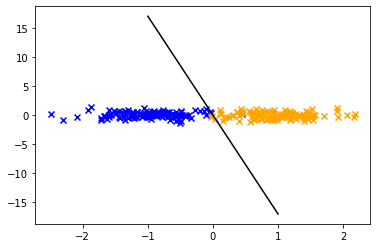

In [ ]:
plot_fig(d1, d2, w,  "For sigma1 = sigma2 = 0.25")

## Experiment 2 :
- Generate one data set for sigma1 = sigma2 = 0.75

*  **Question 1: Does the algorithm converges? Why?**

---

- Here the algorithm is unable to converge since the variance is very high which makes the datapoints not linearly separable and confuse the algorithm.
---


*   **Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?**


---
- Like the previous experiment the decision boundry isn't unique since it's dependant from the weights and the datapoints.
---




*   **Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.**


---
- After a call the sk-learn accuracy function we get an accuracy of  0.66 on the test set, the decision boundry is plotted on the cells below.



In [ ]:
X, y, d1,d2 , X_train, X_test, y_train, y_test = get_split_data([[0.75,0], [0,0.75]], [-1, 0] , [1, 0], 125)

In [ ]:
w = perceptron(X_train,y_train)
y_pred = np.inner(X_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.88

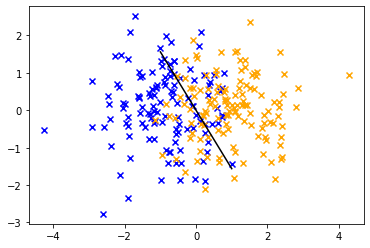

In [ ]:
plot_fig(d1, d2, w,  "For sigma1 = sigma2 = 0.75")

## Experiment 3 :

*   Question 1: Generate the data and train your model .
*   Question 2: Compute the error on the test set.

In [ ]:
sigmas = np.array([0.01, 0.1, 0.25, 0.5, 0.7, 0.75])
N = 30

In [ ]:
def get_accuracy(X_test,y_test,w):
    y_pred = np.inner(X_test,w) 
    for i,pred in enumerate(y_pred) :
        if pred > 0 :
            y_pred[i] = 1
        else :
            y_pred[i] = -1
    return accuracy_score(y_test,y_pred)

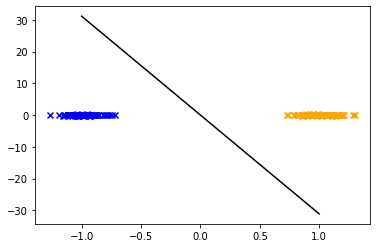

Sigma = 0.01, Mean = 1.0 , Variance = 0.01


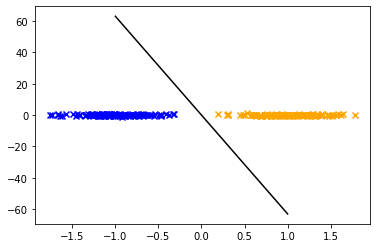

Sigma = 0.1, Mean = 0.998 , Variance = 0.1


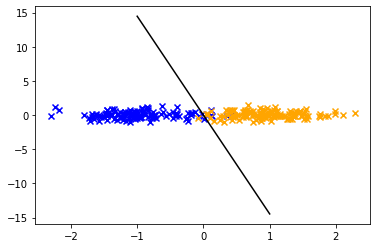

Sigma = 0.25, Mean = 0.9613333333333335 , Variance = 0.25


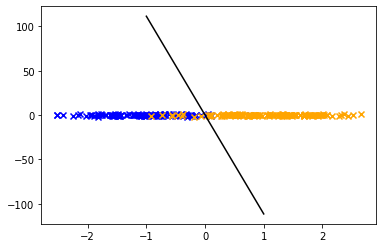

Sigma = 0.5, Mean = 0.912 , Variance = 0.5


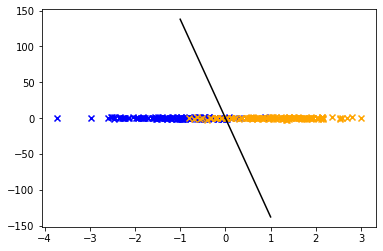

Sigma = 0.7, Mean = 0.8486666666666667 , Variance = 0.7


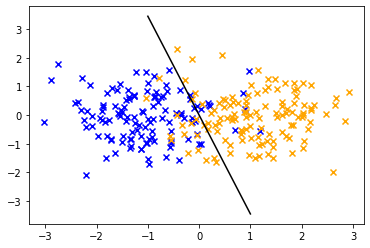

Sigma = 0.75, Mean = 0.826 , Variance = 0.75


In [ ]:
accuracies_mean = []
accuracies_variance = []
for index, sig in enumerate(sigmas):
  title =  f"For sigma**2 = {sig}"
  accuracies = []
  for i in range(N):
    #X, y, X_train, X_test, y_train, y_test = get_split_data(sig, [-1, 0] , [1, 0], 125)
    sigma = [[sig,0], [0,sig]]
    X, y,d1,d2, X_train, X_test, y_train, y_test = get_split_data(sigma, [-1, 0] , [1, 0], 125)
    w = perceptron(X_train,y_train)
    accuracies.append(get_accuracy(X_test,y_test,w))
  plot_fig(d1, d2, w, "sigma = {} ".format(sig))
  accuracies_mean.append(1-np.mean(accuracies))
  accuracies_variance.append(np.std(accuracies))
  print("Sigma = {}, Mean = {} , Variance = {}".format(sig,np.mean(accuracies), sig,np.std(accuracies)))


<ErrorbarContainer object of 3 artists>

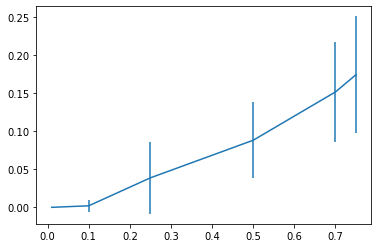

In [ ]:
plt.errorbar(x=sigmas,y=accuracies_mean,yerr=accuracies_variance)

# Conclusion :
- As we can see in the errorbar figure above,  as we increase the variation of the distribution, the average error increases aswell as it's variance which makes sense since if we increase the variation the datapoints will no longer be linearly separable which we can see in the different plot above : The left datapoints are getting closer to the right one making finding a linear decision boundry a very hard task this increasing the error especially for values of sigma higher then 0.25.